In [1]:
import skimage.restoration as sr
import numpy as np
import dicom
import glob
import h5py
import os
import scipy.io as scio
from skimage import exposure
from skimage.io import imsave, imread
from scipy.misc import imresize
from medpy.filter.noise import immerkaer
from scipy.io import savemat
from scipy import ndimage, misc
import matplotlib.pyplot as plt
%matplotlib inline
import re

ImportError: 
Pydicom via 'import dicom' has been removed in pydicom version 1.0.
Please install the `dicom` package to restore function of code relying
on pydicom 0.9.9 or earlier. E.g. `pip install dicom`.
Alternatively, most code can easily be converted to pydicom > 1.0 by
changing import lines from 'import dicom' to 'import pydicom'.
See the Transition Guide at
https://pydicom.github.io/pydicom/stable/transition_to_pydicom1.html.


In [ ]:
def atoi(text) : 
    return int(text) if text.isdigit() else text

In [ ]:
def natural_keys(text) :
    return [atoi(c) for c in re.split('(\d+)', text)]

In [4]:
'''root_path = ""
filenames = []
for root, dirnames, filenames in os.walk("Dataset/Resized_train//"):
    filenames.sort(key = natural_keys)
    rootpath = root
'''    
    
## Sim's changes
root_path = ""
filenames = ['con_H1_N01848_LA_1_272.tif']
cwd = os.getcwd() + '/Dataset/OCTlabel041818/H1_N01848_LA_1_272/' + filenames[0]
print(cwd)
'''
for root, dirnames, filenames in os.walk("Dataset/OCTlabel041818/H1_N01848_LA_1_272/"):
    filenames.sort(key = natural_keys)
    print('root:',root)
    print('dirnames:',dirnames)

    rootpath = root
'''

NameError: name 'os' is not defined

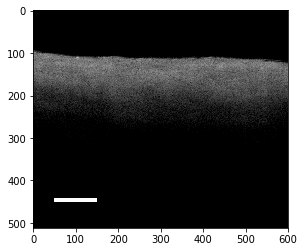

In [50]:
image = plt.imread(cwd)
plt.imshow(image,cmap = "gray")

In [51]:
print(filenames)

['con_H1_N01848_LA_1_272.tif']


In [52]:
images = []

for filename in filenames :
    filepath = os.path.join(root,filename)
    image = plt.imread(filepath)
    images.append(image)
    print(filename)
'''
for filename in filenames :
    filepath = os.path.join(root,filename)
    image = ndimage.imread(filepath, mode = "L")
    images.append(image)
    print(filename)
'''

FileNotFoundError: [Errno 2] No such file or directory: 'Dataset/OCTlabel041818/H1_N01848_LA_1_272/.ipynb_checkpoints/con_H1_N01848_LA_1_272.tif'

In [12]:
print(len(images))

2


In [53]:
denoisedimages = []

In [54]:
hval = 10
alpha = 15
beta = 1

In [15]:
def denoiseImage(image):
    maxvalue = np.max(image)
    newimage = image*(255.0/maxvalue).astype(np.uint8)
    denoised = sr.denoise_nl_means(newimage, multichannel=False, h=hval)
    denoised = denoised - (alpha*beta)
    denoised[denoised<0]=0
    denoised = denoised.astype(np.uint8)
    denoisedimages.append(denoised)

In [55]:
denoiseImage(image)
#for image in images:
#    denoiseImage(image)

In [56]:
print(len(denoisedimages))

1


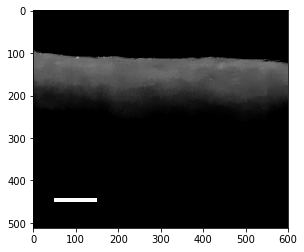

In [57]:
plt.imshow(denoisedimages[0],cmap="gray")

In [58]:
print (np.max(denoisedimages[0]))

240


In [63]:
title = cwd[:-4]+'_denoised.png'
print(title)

/Users/sim/Desktop/Imperial/Project/PreTrained/ReLayNet/Dataset/OCTlabel041818/H1_N01848_LA_1_272/con_H1_N01848_LA_1_272_denoised.png


In [64]:
imsave(title,denoisedimages[0])

In [16]:
# Not necessary for me as this would create 1 whole folder with all denoised images.
'''
for item in range(770):
    imsave('/home/iplab/Desktop/DenoisedTrain/denoised_'+str(item+1)+'.png',denoisedimages[item])
'''